In [1]:
import pandas as pd

In [8]:
pd.set_option("display.max_columns", 100)

In [84]:
df = pd.read_csv('../data/bookings-with-transient-status.csv')

In [85]:
print('''There are {} rows. Each row is a person getting booked (all the charges are collapsed together).'''.format(df.shape[0]))

df.head(3)

There are 167633 rows. Each row is a person getting booked (all the charges are collapsed together).


,Name,Booked,Location,DOB,Race,Sex,Case No,Arresting Agency,Arrest Date,camping,fta,ftc,booking_time,boulder,urination,vehicle_as_residence,public_obstruct,public_trespass,begging,antihomeless,smoking,any_antihomeless,Address,City,State,ZIP Code,Booking Date,Booking Time,Facility,transient
0,"HOOD,AARON JAY",2000-01-01 02:12:00,,1975-10-08,W,M,991126052,UNIVERSITY OF COLORADO,1999-12-31,False,True,False,2000-01-01 02:12:00,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,"LAWYER,KENNETH A",2000-01-01 04:01:00,,1958-09-29,W,M,991001313,JAIL MITTS ONLY,2000-01-16,False,False,False,2000-01-01 04:01:00,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,"AGUILAR TORRES,MIGUEL",2000-01-01 03:11:00,,1972-11-14,W,M,991126053,UNIVERSITY OF COLORADO,1999-12-31,False,False,False,2000-01-01 03:11:00,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline

In [70]:
import matplotlib.dates as mdates

def plot_two(data1, data2, xlabel, ylabel1, ylabel2, title=''):
    fig, ax1 = plt.subplots(figsize=(24, 8))

    color1 = '#3498db'
    color2 = '#e74c3c'
    
    ax1.set_title(title)
    month_locator = mdates.MonthLocator(interval=6)
    ax1.xaxis.set_major_locator(month_locator)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.plot(data1, color=color1, alpha=0.7)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1, color=color1)
    for tleft in ax1.get_yticklabels():
        tleft.set_color(color1)

    ax2 = ax1.twinx()
    ax2.plot(data2, color=color2, alpha=0.7)
    ax2.set_ylabel(ylabel2, color=color2)
    for tright in ax2.get_yticklabels():
        tright.set_color(color2)
    
    fig.autofmt_xdate()
    plt.show()

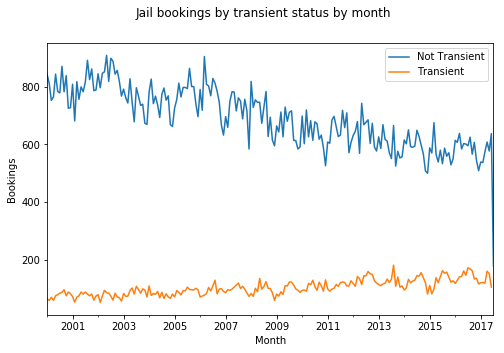

In [44]:
df[df.transient].groupby(pd.DatetimeIndex(df[df.transient].Booked).to_period('M')).Name.count().plot(label='Transient')

plt.suptitle('Jail bookings by transient status by month')
plt.ylabel('Bookings')
plt.xlabel('Month')
plt.legend()

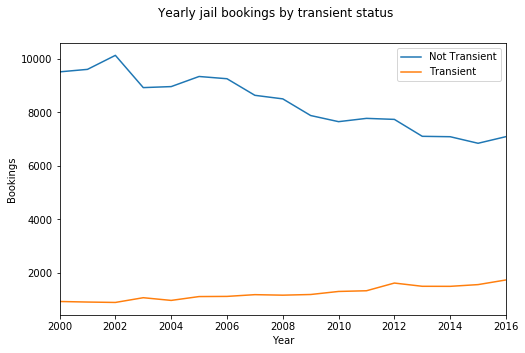

In [49]:
fig = plt.figure(figsize=(8, 5))
df[~df.transient].groupby(pd.DatetimeIndex(df[~df.transient].Booked).year).Name.count()[:-1].plot(label='Not Transient')
df[df.transient].groupby(pd.DatetimeIndex(df[df.transient].Booked).year).Name.count()[:-1].plot(label='Transient')

plt.suptitle('Yearly jail bookings by transient status')
plt.ylabel('Bookings')
plt.xlabel('Year')
plt.legend()

In [76]:
non_transient_bookings = df[~df.transient].groupby(pd.DatetimeIndex(df[~df.transient].Booked).to_period('M')).Name.count()[:-1]
transient_bookings = df[df.transient].groupby(pd.DatetimeIndex(df[df.transient].Booked).to_period('M')).Name.count()[:-1]

In [77]:
transient_bookings.index = transient_bookings.index.to_datetime()
non_transient_bookings.index = non_transient_bookings.index.to_datetime()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: to_datetime is deprecated. Use self.to_timestamp(...)
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: to_datetime is deprecated. Use self.to_timestamp(...)
  from ipykernel import kernelapp as app


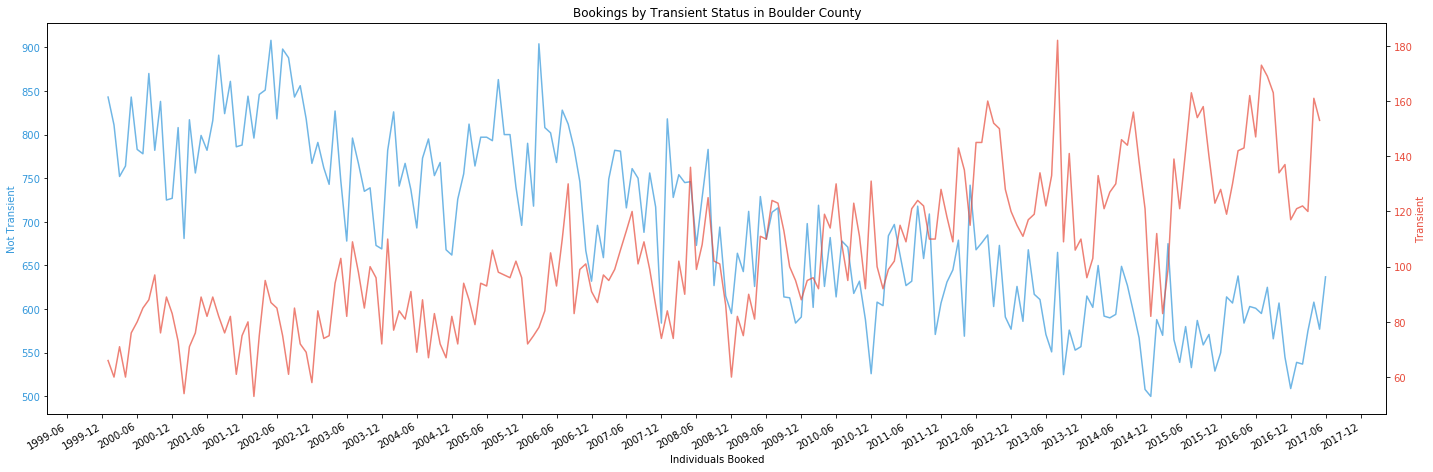

In [78]:
plot_two(non_transient_bookings, transient_bookings,
        xlabel="Individuals Booked", ylabel1="Not Transient", ylabel2="Transient", title="Bookings by Transient Status in Boulder County")

In [81]:
df['DOB'] = pd.to_datetime(df['DOB'])

In [83]:
df.head()

,Name,Booked,Location,DOB,Race,Sex,Case No,Arresting Agency,Arrest Date,camping,fta,ftc,booking_time,boulder,urination,vehicle_as_residence,public_obstruct,public_trespass,begging,antihomeless,any_antihomeless,Address,City,State,ZIP Code,Booking Date,Booking Time,Facility,transient
0,"HOOD,AARON JAY",2000-01-01 02:12:00,,1975-10-08,W,M,991126052,UNIVERSITY OF COLORADO,1999-12-31,False,False,False,2000-01-01 02:12:00,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,"LAWYER,KENNETH A",2000-01-01 04:01:00,,1958-09-29,W,M,991001313,JAIL MITTS ONLY,2000-01-16,False,False,False,2000-01-01 04:01:00,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,"AGUILAR TORRES,MIGUEL",2000-01-01 03:11:00,,1972-11-14,W,M,991126053,UNIVERSITY OF COLORADO,1999-12-31,False,False,False,2000-01-01 03:11:00,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,"JUDD,OLIVER RANDALL",2000-01-01 01:25:00,,1953-06-07,W,M,991031932,BOULDER PD,1999-12-31,False,False,False,2000-01-01 01:25:00,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,"WINTER,STEPHEN SHANE",2000-01-01 03:49:00,,1961-09-09,W,M,991102428,LONGMONT PD,1999-12-31,False,False,False,2000-01-01 03:49:00,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
